In [6]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from skntk import NeuralTangentKernel as NTK
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [7]:
data=pd.read_csv(r'D:\CODING\Python\NLP\END_SEM\IMDB Dataset.csv')

In [8]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)  # Join tokens back into a single string


data['review'] = data['review'].apply(preprocess_text)

data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0})


In [9]:
data.head()

,review,sentiment,label
0,one reviewers mentioned watching oz episode yo...,positive,1
1,wonderful little production br br filming tech...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically theres family little boy jake thinks...,negative,0
4,petter matteis love time money visually stunni...,positive,1


In [10]:
num_iterations = 50

svm_reports = []
rf_reports = []
xgb_reports = []

for i in range(num_iterations):
    print(f"Iteration {i + 1}")
    df_subset = data.sample(n=5000, random_state=i)

    ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
    X_ngram = ngram_vectorizer.fit_transform(df_subset['review'])

    X_train, X_test, y_train, y_test = train_test_split(X_ngram, df_subset['label'], test_size=0.2, random_state=42)

    # SVM
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
    svm_reports.append(svm_report)

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
    rf_reports.append(rf_report)

    # XGBoost
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
    xgb_reports.append(xgb_report)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50


In [16]:
def average_classification_report(reports):
    avg_report = {}
    for metric in reports[0].keys():
        if isinstance(reports[0][metric], dict):
            avg_report[metric] = {cls: np.mean([report[metric][cls] for report in reports]) for cls in reports[0][metric].keys()}
        else:
            avg_report[metric] = np.mean([report[metric] for report in reports])
    return avg_report


In [17]:
avg_svm_report = average_classification_report(svm_reports)
print("Average SVM Classification Report:")
print(avg_svm_report)


Average SVM Classification Report:
{'0': {'precision': 0.8667247266359246, 'recall': 0.7653402531470657, 'f1-score': 0.8126470403236202, 'support': 506.92}, '1': {'precision': 0.7847275008070699, 'recall': 0.8786795905346473, 'f1-score': 0.828884256100466, 'support': 493.08}, 'accuracy': 0.82132, 'macro avg': {'precision': 0.8257261137214974, 'recall': 0.8220099218408566, 'f1-score': 0.820765648212043, 'support': 1000.0}, 'weighted avg': {'precision': 0.8265044052736363, 'recall': 0.82132, 'f1-score': 0.8208102574844632, 'support': 1000.0}}


In [18]:
avg_rf_report = average_classification_report(rf_reports)
print("Average Random Forest Classification Report:")
print(avg_rf_report)

Average Random Forest Classification Report:
{'0': {'precision': 0.8510741390989582, 'recall': 0.7962361322471304, 'f1-score': 0.8222166813836307, 'support': 506.92}, '1': {'precision': 0.8039573953136622, 'recall': 0.8561079923020037, 'f1-score': 0.8287800904555344, 'support': 493.08}, 'accuracy': 0.8257799999999998, 'macro avg': {'precision': 0.8275157672063104, 'recall': 0.826172062274567, 'f1-score': 0.8254983859195825, 'support': 1000.0}, 'weighted avg': {'precision': 0.8280979145866589, 'recall': 0.8257799999999998, 'f1-score': 0.8255934738855819, 'support': 1000.0}}


In [19]:
avg_xgb_report = average_classification_report(xgb_reports)
print("Average XGBoost Classification Report:")
print(avg_xgb_report)


Average XGBoost Classification Report:
{'0': {'precision': 0.8426785091589335, 'recall': 0.804513942240922, 'f1-score': 0.8229500551874273, 'support': 506.92}, '1': {'precision': 0.8080731664317582, 'recall': 0.8456466658611714, 'f1-score': 0.8262364635715049, 'support': 493.08}, 'accuracy': 0.8247399999999999, 'macro avg': {'precision': 0.8253758377953458, 'recall': 0.8250803040510466, 'f1-score': 0.824593259379466, 'support': 1000.0}, 'weighted avg': {'precision': 0.8259250634875065, 'recall': 0.8247399999999999, 'f1-score': 0.8246984469969995, 'support': 1000.0}}


In [22]:
# Get the best model based on the accuracy score 

accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(accuracy_rf, accuracy_svm, accuracy_xgb)

0.821 0.822 0.802


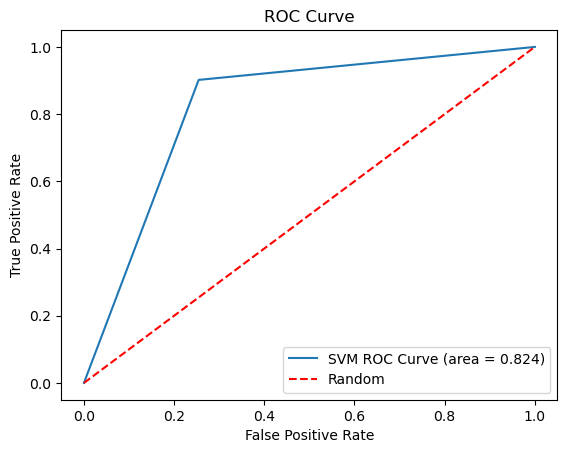

In [24]:
# Get the ROC AUC score for the best model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the ROC curve for the best model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, label='SVM ROC Curve (area = %0.3f)' % roc_auc)

# Add the random line
ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')

# Set the title and labels
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Add the legend
ax.legend()

# Show the plot
plt.show()